<img src="https://wealthface.com/blog/wp-content/uploads/2021/05/SP500.jpg">

                    
                         D A T A    S C I E N C E    A S S I G N M E N T
               - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                     Title    :  S&P500 Stock Prediction
                     Members  : 
                                 (1) - Ong Kuan Lin
                                 (2) - Ashley Chew Kai Wenn
                                 (3) - Chong Kah Jie
                                 (4) - Tan Jia Xin
               - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Import Libraries</p>

In [1]:
import pandas as pd
import glob
import numpy as np
from numpy import array
from math import sqrt
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from keras import models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns 
from scipy import signal 
from statsmodels.tsa.seasonal import seasonal_decompose 
import keras_tuner
import warnings
import joblib
import sys
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px; padding-left:50px;">Load Raw Data</p>

In [2]:
# Read csv file(s)
stock_list = []
company_name = ['HPQ', 'KO', 'MO', 'DIS', 'BA', 'GE', 'IBM', 'CAT', 'MRK', 'XOM', 'JNJ']

for i in company_name:
    d = pd.read_csv(i + '.csv')
    stock_list.append(d)

dataset1 = pd.concat(stock_list, axis = 0, ignore_index = True)

dataset = pd.DataFrame(dataset1).groupby('Date').agg({'Open':'mean', 'High':'mean', 'Low':'mean', 
                                                      'Close':'mean', 'Volume':'mean', 
                                                     'Dividends':'mean', 'Stock Splits':'mean'})

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Shape of dataset</p>

In [3]:
#Shape of dataset
print("\nDataset Shape / Size")
print("----------------------")
print("Dataset Shape: ", dataset.shape)
print("         Row : ", len(dataset.index))
print("      Column : ", len(dataset.columns))

dataset.head(5)


Dataset Shape / Size
----------------------
Dataset Shape:  (15236, 7)
         Row :  15236
      Column :  7


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.322860,0.347306,0.341236,0.342356,6.548708e+05,0.0,0.0
1962-01-03,0.320019,0.344361,0.340264,0.343240,1.232810e+06,0.0,0.0
1962-01-04,0.322441,0.347171,0.340288,0.341477,8.653648e+05,0.0,0.0
1962-01-05,0.319531,0.342602,0.332620,0.335597,8.455177e+05,0.0,0.0
1962-01-08,0.314203,0.336670,0.327754,0.332881,9.231089e+05,0.0,0.0


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Description</p>

In [4]:
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15236.000000,15236.000000,15236.000000,15236.000000,1.523600e+04,15236.000000,15236.000000
mean,26.348427,26.617339,26.082277,26.353701,6.642596e+06,0.004263,0.000988
std,32.718177,33.023278,32.390475,32.707715,5.135565e+06,0.045341,0.014919
min,0.212665,0.235821,0.226084,0.230875,2.853415e+05,0.000000,0.000000
25%,1.139749,1.149291,1.130476,1.139989,2.178579e+06,0.000000,0.000000
50%,7.665165,7.734820,7.582284,7.670241,6.003246e+06,0.000000,0.000000
75%,41.897612,42.422986,41.353539,41.908573,9.277770e+06,0.000000,0.000000
max,121.532900,122.333929,120.370750,121.167713,5.218678e+07,4.641818,0.545455


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Dataset Information</p>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15236 entries, 1962-01-02 to 2022-07-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15236 non-null  float64
 1   High          15236 non-null  float64
 2   Low           15236 non-null  float64
 3   Close         15236 non-null  float64
 4   Volume        15236 non-null  float64
 5   Dividends     15236 non-null  float64
 6   Stock Splits  15236 non-null  float64
dtypes: float64(7)
memory usage: 952.2+ KB


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Correlation between columns</p>

In [6]:
dataset.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999968,0.999956,0.999931,0.569141,0.091792,-0.027301
High,0.999968,1.000000,0.999920,0.999954,0.570680,0.091769,-0.027285
Low,0.999956,0.999920,1.000000,0.999956,0.566840,0.091753,-0.027289
Close,0.999931,0.999954,0.999956,1.000000,0.568772,0.091771,-0.027261
Volume,0.569141,0.570680,0.566840,0.568772,1.000000,0.087351,-0.024237
Dividends,0.091792,0.091769,0.091753,0.091771,0.087351,1.000000,-0.003123
Stock Splits,-0.027301,-0.027285,-0.027289,-0.027261,-0.024237,-0.003123,1.000000


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:280%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Visualization</p>

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Visualization - (1) Heatmap</p>

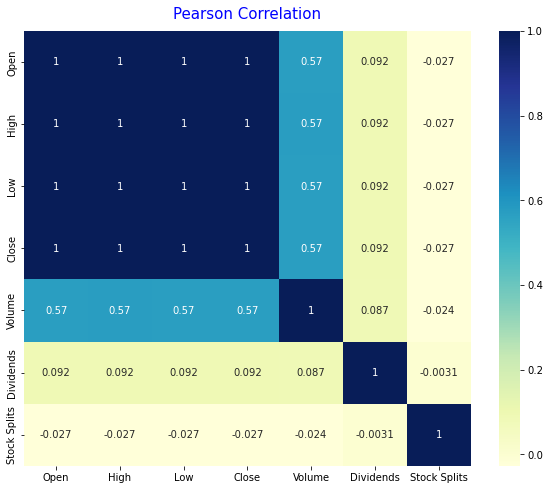

In [7]:
# Visualize the correlation using pearson correlation
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [8]:
sns.set_style('dark')
temp = dataset[['Open', 'Low', 'High', 'Close', 'Volume', 'Dividends', 'Stock Splits']]

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Visualization - (2) Histogram</p>

Features
--------


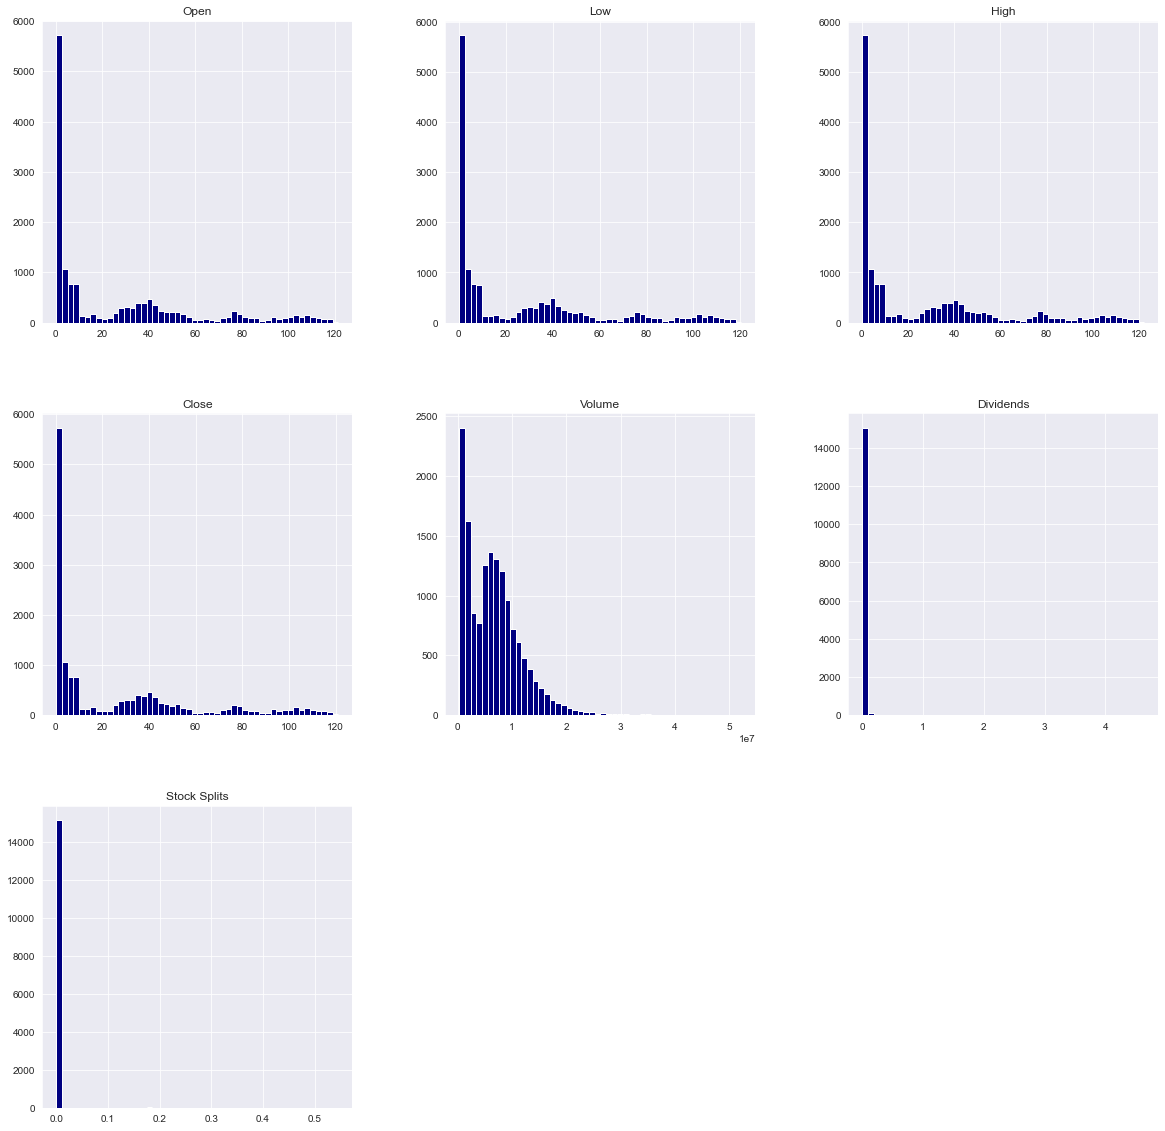

In [9]:
# Histogram
print("Features")
print("--------")
temp.hist(bins=50, figsize=(20,20), color='navy');

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Select the features and target</p>

In [10]:
# Set Target Variable
target = dataset['High']

# Selecting the Features to be scaled later
featuresToBeScaled = ['Open', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:280%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Data Preprocessing</p>

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Dealing with null values</p>

In [11]:
isNullExist = dataset.isnull().any()

if('True' in str(isNullExist)):
    nullData = dataset[dataset.isnull().any(axis=1)]
    print('Before data cleaning')
    print('____________________\n')
    print('Null value exist: True')
    print('\nRow(s) consisting of null values')
    print('--------------------------------')
    print(nullData)

    featuresToBeReplaced = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
    
    for i in featuresToBeReplaced:
        mean_value = 0
        mean_value = dataset[i].mean()
        
        if(i != 'Volume'):
            dataset[i].fillna(value=mean_value, inplace=True)
        else:
            dataset[i].fillna(value=int(mean_value), inplace=True)
    
    print('\n\nAfter data cleaning')
    print('___________________\n')
    nullData = dataset[dataset.isnull().any(axis=1)]
    print(nullData)
    
else:
    print("No missing / null values in dataset")

No missing / null values in dataset


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Scaling</p>

In [12]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(dataset[featuresToBeScaled])
feature_transform = pd.DataFrame(columns=featuresToBeScaled, data=feature_transform, 
                                 index=dataset.index)
print("\nDataset after scaling:")
print("-----------------------")
print(feature_transform)

output_var = pd.DataFrame(dataset['High'])


Dataset after scaling:
-----------------------
                Open       Low     Close    Volume  Dividends  Stock Splits
Date                                                                       
1962-01-02  0.000908  0.000958  0.000922  0.007120        0.0           0.0
1962-01-03  0.000885  0.000950  0.000929  0.018255        0.0           0.0
1962-01-04  0.000905  0.000951  0.000915  0.011175        0.0           0.0
1962-01-05  0.000881  0.000887  0.000866  0.010793        0.0           0.0
1962-01-08  0.000837  0.000846  0.000843  0.012288        0.0           0.0
...              ...       ...       ...       ...        ...           ...
2022-07-06  0.823029  0.817698  0.821060  0.185257        0.0           0.0
2022-07-07  0.831032  0.831863  0.836590  0.167212        0.0           0.0
2022-07-08  0.833430  0.831901  0.833734  0.131716        0.0           0.0
2022-07-11  0.826446  0.826453  0.827329  0.140305        0.0           0.0
2022-07-12  0.821793  0.822095  0.830757

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Splitting to Training set and Test set</p>

In [13]:
timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): 
                                                (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): 
                                                (len(train_index)+len(test_index))].values.ravel()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Process the data for LSTM (Reshape)</p>

In [14]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Feature Reduction - Variance Threshold</p>

In [15]:
thresholder = VarianceThreshold(threshold = 0.005)

features_high_variance = thresholder.fit_transform(feature_transform)

thresholder.get_support(indices = True)

array([0, 1, 2, 3], dtype=int64)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Drop insignificant feature(s)</p>

In [16]:
feature_transform.drop(feature_transform.columns[4:], axis=1, inplace=True)
print("After feature reduction by Lasso CV")
print("-----------------------------------")

print(feature_transform.head(5))

After feature reduction by Lasso CV
-----------------------------------
                Open       Low     Close    Volume
Date                                              
1962-01-02  0.000908  0.000958  0.000922  0.007120
1962-01-03  0.000885  0.000950  0.000929  0.018255
1962-01-04  0.000905  0.000951  0.000915  0.011175
1962-01-05  0.000881  0.000887  0.000866  0.010793
1962-01-08  0.000837  0.000846  0.000843  0.012288


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Building the 1st Model (LSTM - Long Short Term Memory)</p>

def build_model(hp):
    lstmUnits = hp.Int('lstmUnits', min_value=1, max_value=16, step=1)
    dropoutUnits = hp.Float('dropoutUnits', min_value=0, max_value=0.03, step=0.01)
    
    model = Sequential()

    model.add(LSTM(units=lstmUnits, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
    model.add(Dropout(rate=dropoutUnits))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model tuning using Keras Random Search Tuner</p>

In [18]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=5,
    directory="results",
    project_name="custom_training",
    overwrite=True
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_model = tuner.get_best_models()[0]
best_hps = tuner.get_best_hyperparameters()[0]
checkpoint = tf.train.Checkpoint(best_model)
save_path = checkpoint.save('/tmp/training_checkpoints')
checkpoint.restore(save_path)

print(best_hps.values)

Trial 5 Complete [00h 00m 06s]
val_loss: 141.77374267578125

Best val_loss So Far: 42.380088806152344
Total elapsed time: 00h 00m 32s
INFO:tensorflow:Oracle triggered exit
{'lstmUnits': 16, 'dropoutUnits': 0.02}


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model Training</p>

In [19]:
lstm_model = best_model.fit(X_train, y_train, epochs=200, verbose=1, shuffle=False, batch_size=64, 
                      validation_data=(X_test, y_test), validation_split=0.33)

Epoch 1/200
217/217 [==============================] - 1s 2ms/step - loss: 4.7292 - val_loss: 41.1800
Epoch 2/200
217/217 [==============================] - 0s 1ms/step - loss: 4.6055 - val_loss: 33.9809
Epoch 3/200
217/217 [==============================] - 0s 1ms/step - loss: 4.4227 - val_loss: 30.1337
Epoch 4/200
217/217 [==============================] - 0s 1ms/step - loss: 4.5079 - val_loss: 27.5382
Epoch 5/200
217/217 [==============================] - 0s 1ms/step - loss: 4.5219 - val_loss: 24.5121
Epoch 6/200
217/217 [==============================] - 0s 1ms/step - loss: 4.1656 - val_loss: 25.8931
Epoch 7/200
217/217 [==============================] - 0s 1ms/step - loss: 4.4507 - val_loss: 25.6361
Epoch 8/200
217/217 [==============================] - 0s 1ms/step - loss: 4.6799 - val_loss: 22.3269
Epoch 9/200
217/217 [==============================] - 0s 1ms/step - loss: 4.4426 - val_loss: 20.7466
Epoch 10/200
217/217 [==============================] - 0s 1ms/step - loss: 4.4224

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Plotting the Training VS Validation LOSS</p>

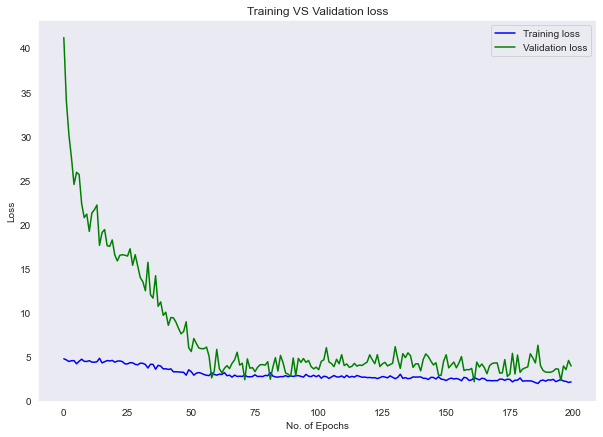

In [20]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.plot(lstm_model.history['loss'], 'r', label='Training loss', color='blue')
plt.plot(lstm_model.history['val_loss'], 'g', label='Validation loss', color='green')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Final Training VS Validation LOSS</p>

In [21]:
train_loss = best_model.evaluate(X_train, y_train, verbose=1)
print("Final Training Loss: ", train_loss)

433/433 [==============================] - 0s 630us/step - loss: 0.2520
Final Training Loss:  0.25195083022117615


In [22]:
test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("Final Test Loss: ", test_loss)

44/44 [==============================] - 0s 638us/step - loss: 3.9081
Final Test Loss:  3.9081215858459473


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">LSTM Prediction</p>

In [23]:
y_pred = best_model.predict(X_test)

44/44 [==============================] - 0s 698us/step


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Predicted vs Actual 'High' Value (Model 1 - LSTM Model)</p>

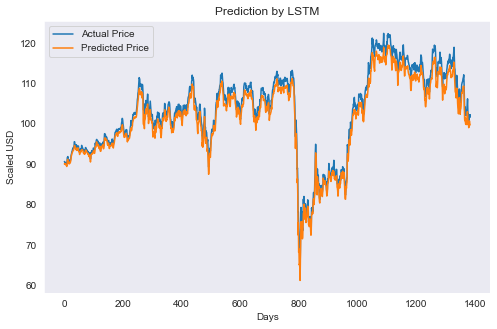

In [24]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(y_test, label="Actual Price")
plt.plot(y_pred, label='Predicted Price')
plt.title("Prediction by LSTM")
plt.xlabel('Days')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Root Mean Square Error (LSTM Model)</p>

In [25]:
sqrt(mean_squared_error(y_test, y_pred)) #larger => worse 

1.9768970010349312

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Building 2nd model (Random Forest Regressor)</p>

In [26]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 5, 7]
}

In [27]:
rf_model = RandomForestRegressor()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Model Tuning using RandomizedSearchCV</p>

In [28]:
ran_search = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 3, 
                           n_iter = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
ran_search.fit(trainX, y_train)
ran_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 300, 'max_depth': 5, 'criterion': 'absolute_error'}

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Fitting the model</p>

In [29]:
rf_model = RandomForestRegressor(n_estimators=ran_search.best_params_['n_estimators'],
                                    max_depth=ran_search.best_params_['max_depth'],
                                    criterion=ran_search.best_params_['criterion'])

rf_model.fit(trainX, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=300)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Plot Sample Tree In Random Forest Regressor</p>

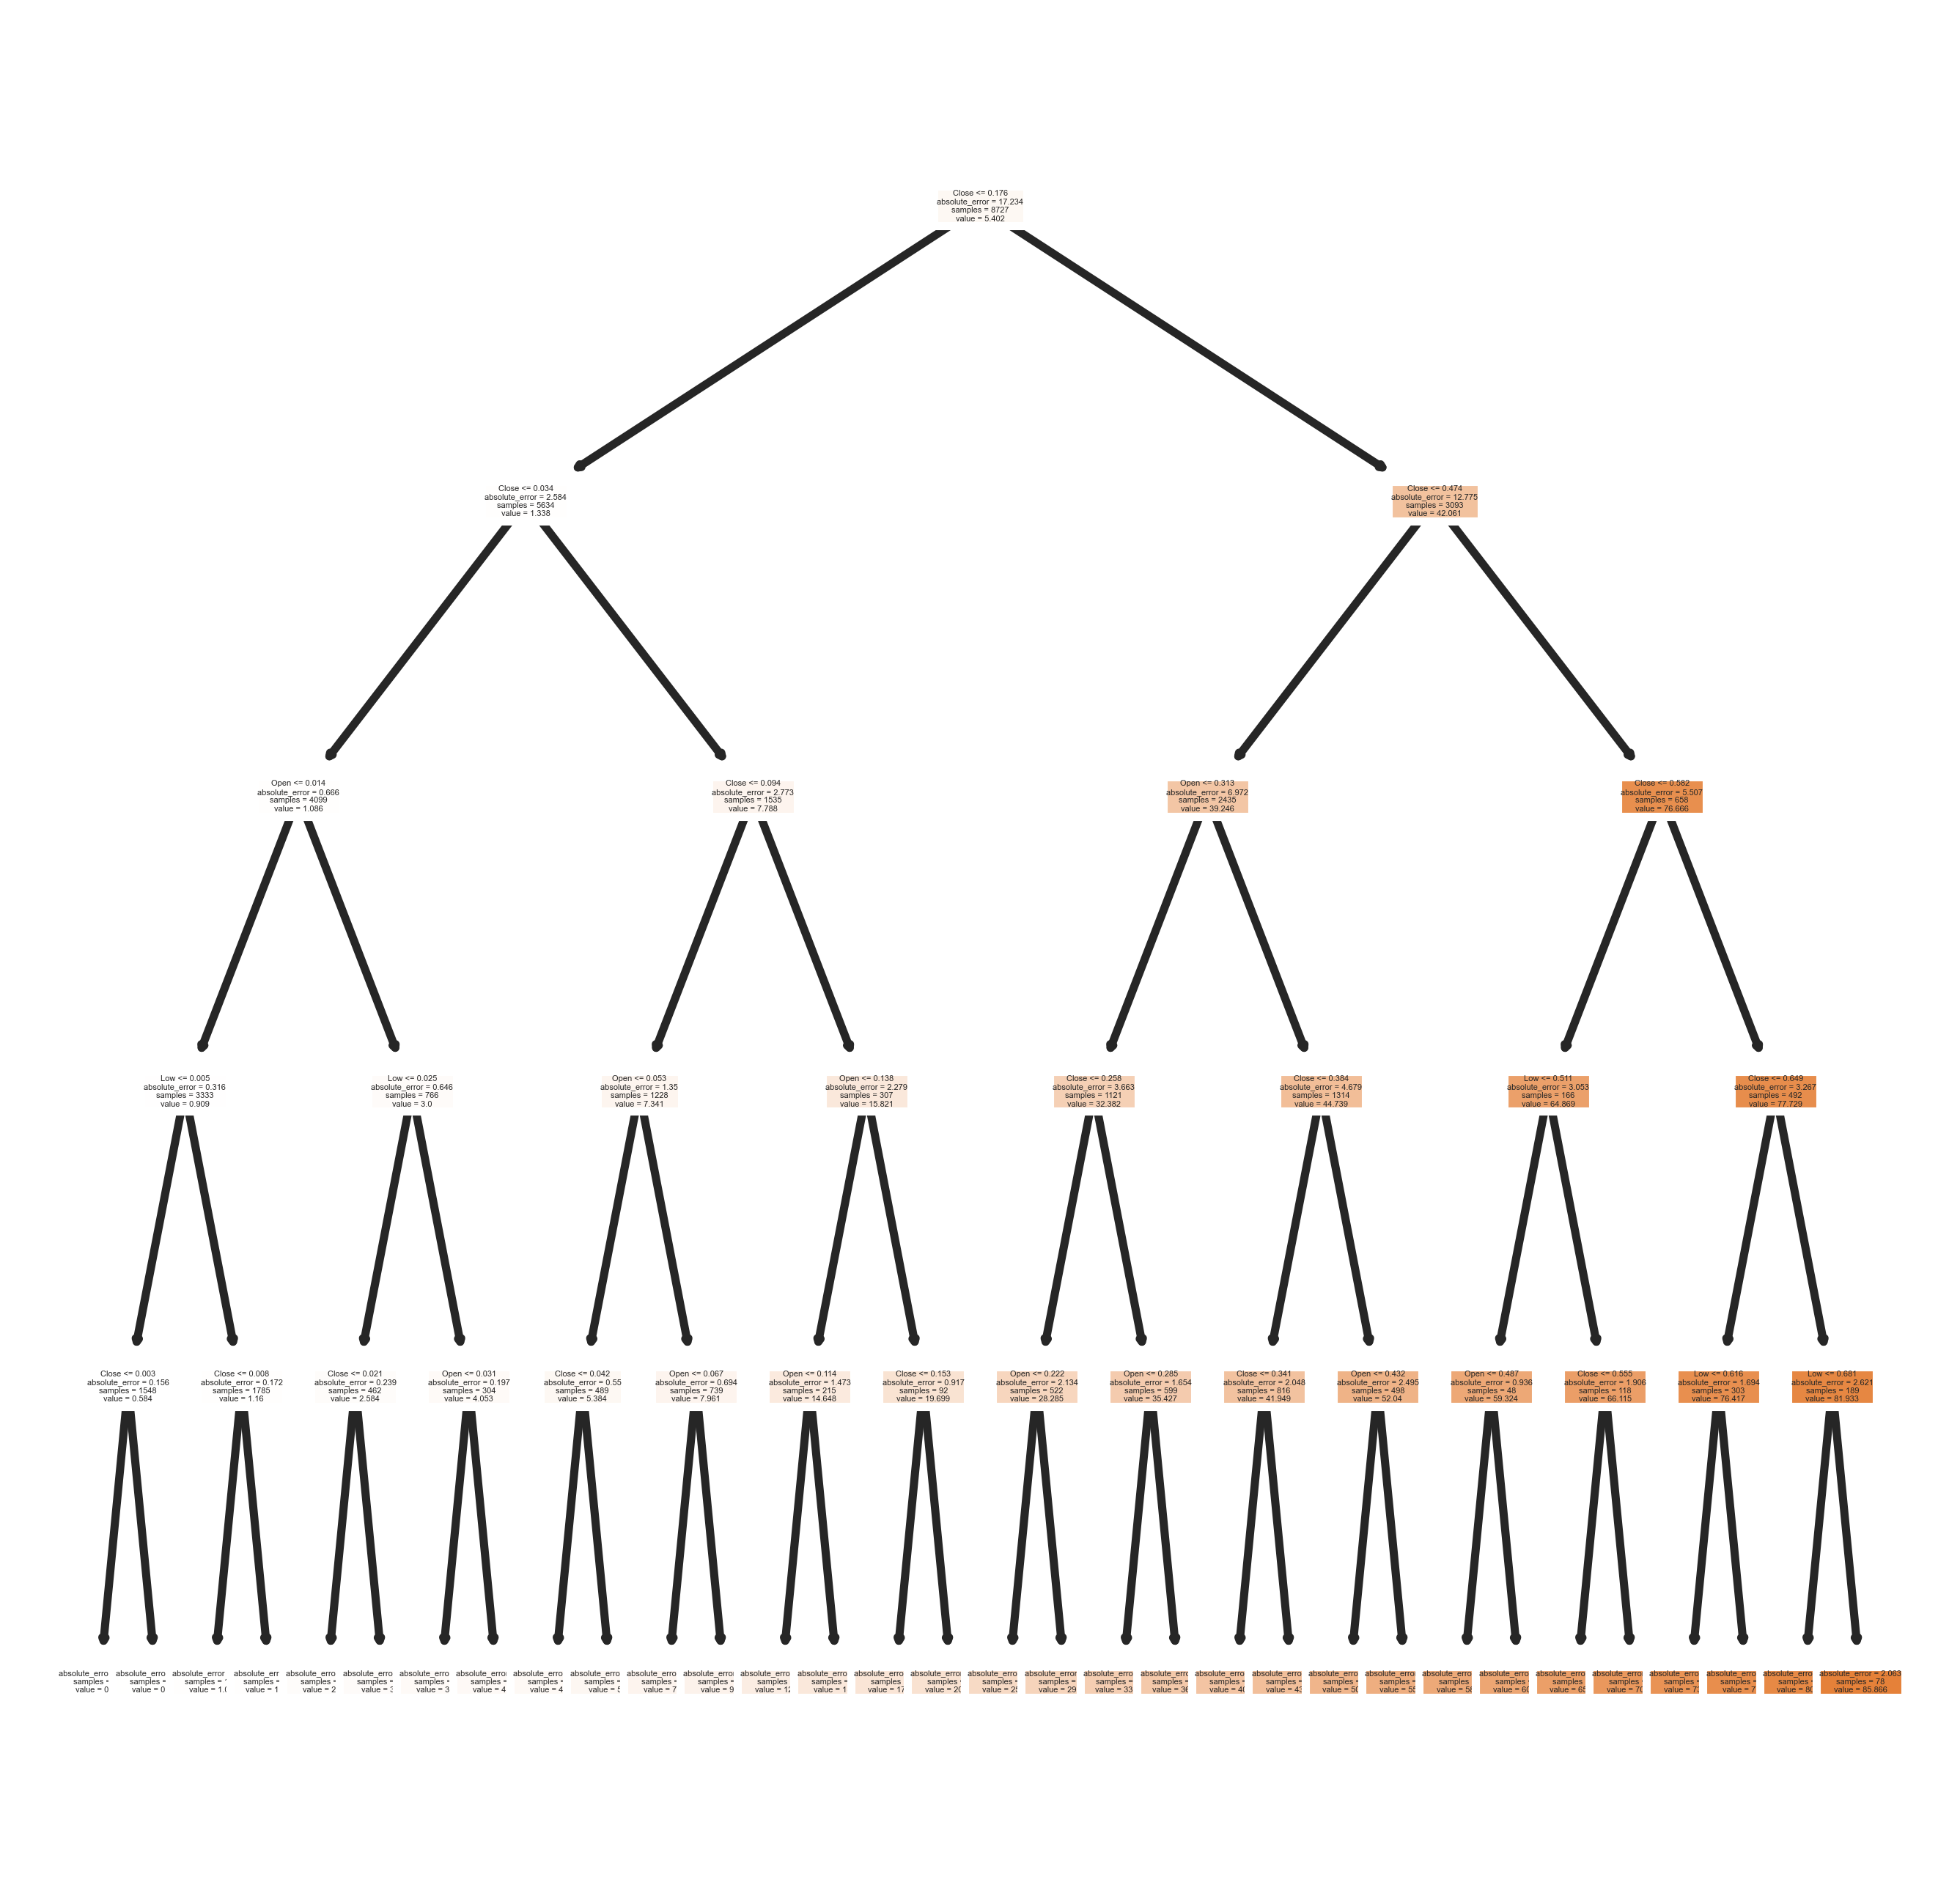

In [30]:
fn = ['Open', 'Low', 'Close', 'Volume']
cn = 'High'

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Random Forest Prediction</p>

In [31]:
y_pred2 = rf_model.predict(testX)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Predicted vs Actual 'High' Value</p>

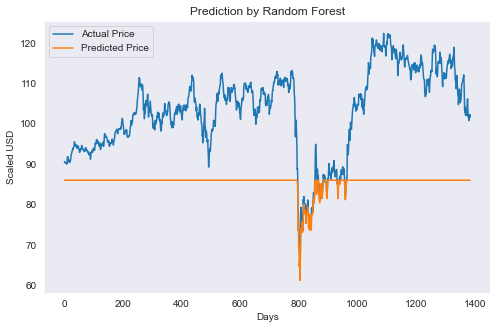

In [32]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred2, label='Predicted Price')
plt.title("Prediction by Random Forest")
plt.xlabel('Days')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Root Mean Square Error (Model 2 - Random Forest Regressor)</p>

In [33]:
sqrt(mean_squared_error(y_test, y_pred2)) #larger => worse 

19.851341842144084

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Building 3rd model (Decision Tree Regressor)</p>

In [34]:
dtree = DecisionTreeRegressor()

In [35]:
# Create the parameter grid based on the results of random search 
param_grid_dtree = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7]
}

In [36]:
ran_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid_dtree, cv = 3, 
                           n_iter = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
ran_search_dt.fit(trainX, y_train)
ran_search_dt.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'splitter': 'random', 'max_depth': 7, 'criterion': 'friedman_mse'}

In [37]:
dtree = DecisionTreeRegressor(max_depth=ran_search_dt.best_params_['max_depth'],
                                criterion=ran_search_dt.best_params_['criterion'])

dtree = dtree.fit(trainX, y_train)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Plot the decision tree</p>

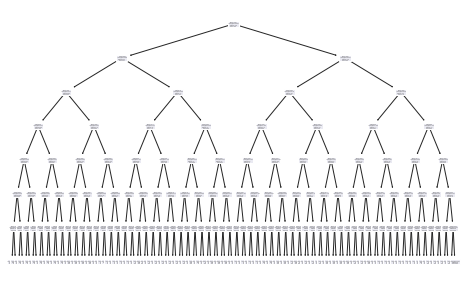

In [38]:
matplotlib.use('Agg')

tree.plot_tree(dtree, feature_names=['Open', 'Low', 'Close', 'Volume'])

sys.stdout.flush()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Prediction by Decision Tree Regressor</p>

In [39]:
y_pred3 = dtree.predict(testX)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Predicted vs Actual 'High' value</p>

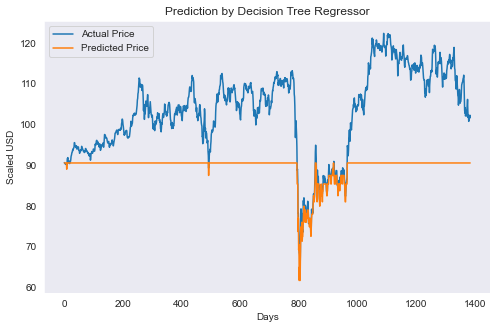

In [40]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred3, label='Predicted Price')
plt.title("Prediction by Decision Tree Regressor")
plt.xlabel('Days')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Root Mean Square Error (Model 3 - Decision Tree)</p>

In [41]:
sqrt(mean_squared_error(y_test, y_pred3)) #larger => worse 

15.988654811690314

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Deploy first model - LSTM</p>

In [42]:
# Save lstm model
best_model.save('lstmModel.h5')

In [43]:
# Summary of the loaded lstm model
lstm_loaded = models.load_model('./lstmModel.h5')

print(lstm_loaded.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1472      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________
None


<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Deploy second model - Random Forest</p>

In [44]:
# Save random forest model
filename1 = 'rfModel.sav'
joblib.dump(rf_model, filename1)

['rfModel.sav']

In [45]:
# Loaded random forest model
loaded_rf = joblib.load(filename1)

loaded_rf

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=300)

<p style="background-color:pink;font-family:newtimeroman;color:black;font-size:150%;text-align:left;border-radius:25px 25px;padding:10px;letter-spacing:1.2px;padding-left:50px;">Deploy 3rd model - Decision Tree</p>

In [46]:
# Save decision tree model
filename2 = 'dtModel.sav'
joblib.dump(rf_model, filename2)

['dtModel.sav']

In [47]:
# Loaded random forest model
loaded_dt = joblib.load(filename2)

loaded_dt

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=300)